In [15]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [16]:
df = pd.read_csv("Thyroid_Diff.csv")

df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [23]:
# Handle categorical features using LabelEncoder
categorical_columns = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']

# Encode all categorical columns
for col in categorical_columns:
    if col in df.columns:  # Ensure the column exists in the dataset
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0


In [18]:
#split dataset in features and target variable
X = df.drop(columns='Recurred') # Features
y = df['Recurred'] # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [19]:
# Create Decision Tree classifer object using information gain as the splitting criteria.
clf = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [20]:

y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred)


Testing:
     Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
189   42       0        0           0                0                 2   
381   61       1        1           1                1                 0   
120   37       0        0           0                0                 2   
207   17       0        0           0                0                 2   
321   62       0        0           0                0                 2   

     Physical Examination  Adenopathy  Pathology  Focality  Risk  T  N  M  \
189                     1           3          3         1     2  2  0  0   
381                     1           1          1         0     0  6  2  0   
120                     4           3          3         1     2  2  0  0   
207                     1           5          3         1     1  2  2  0   
321                     1           5          3         0     1  3  2  0   

     Stage  Response  
189      0         1  
381      3         3  
12

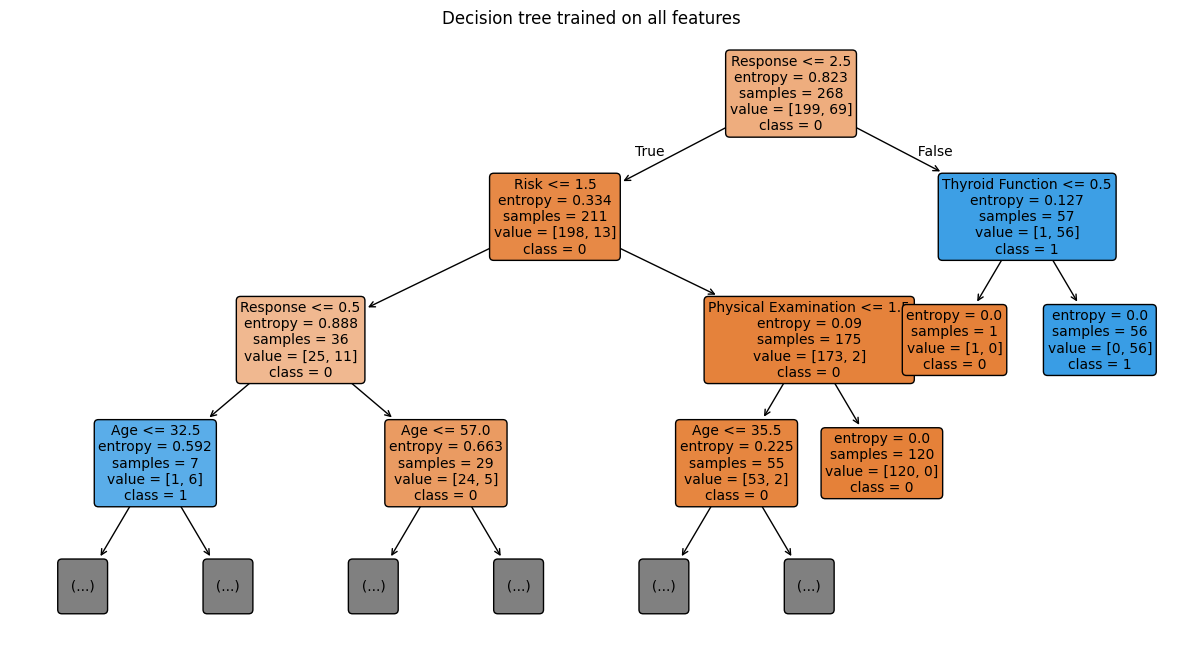

In [22]:
plt.figure(figsize=(15,8))
tree.plot_tree(clf, filled=True, rounded=True, max_depth=3, fontsize=10, feature_names=X.columns,class_names=['0','1'])
plt.title("Decision tree trained on all features")
plt.show()